<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/vector_quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 31st Jan, 2021
# Myfolder:
# Objective(s):
#              Face image compression
#              through vector-quantization 
#
# Ref:
#     https://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html#vector-quantization-example
#
#


# Vector Quantization Example

Face, a 1024 x 768 size image of a raccoon face,
is used here to illustrate how `k`-means is
used for vector quantization.


#### Libraries

In [1]:
# 1.0 Call libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.misc import face
from sklearn import cluster
%matplotlib inline

In [2]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

 `scipy.misc.face(gray=False)` :  Get a 1024 x 768, color image of a raccoon face.

#### Explore data

In [3]:
# 1.2 Get only gray image
r_face = face(gray=True)
r_face.shape    # (768, 1024)

(768, 1024)

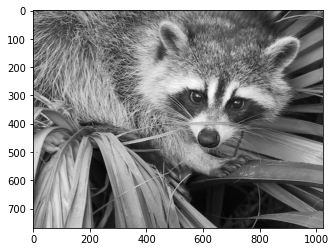

In [4]:
# 1.3 Plot racoon now in gray scale
_= plt.imshow(r_face, cmap = 'gray')

### Perform kmeans clustering

In [5]:
# 2.0 For clustering, 
#     we need an (n_sample, n_feature) array
#     We have only one feature with varying
#     pixel-intensities:

X = r_face.reshape((-1, 1))
X.shape    # (786432, 1)

(786432, 1)

In [6]:
# 2.1 Perform clustering now:

n_clusters = 5
k_means = cluster.KMeans(
                         n_clusters=n_clusters                         
                         )
k_means.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# 2.1.1 Cluster labels for each
#       pixel:

labels = k_means.labels_
len(k_means.labels_)    # 786432

786432

In [9]:
# 2.1.2 Cluster centers:

values = k_means.cluster_centers_
values   # 5 cluster centers

array([[154.76643393],
       [ 75.41095451],
       [ 27.62031146],
       [195.41684458],
       [115.47899819]])

#### Compress image

In [10]:
# 3.0 Remove axes of length one from values
#     Flatten array:

values.squeeze()
values = values.squeeze()

array([154.76643393,  75.41095451,  27.62031146, 195.41684458,
       115.47899819])

`numpy.choose(index-array, choices)` Construct an array from an index array and a set of arrays to choose from. Use index-array to index into choises and extract output.

In [11]:
# 3.1 Learn to work with: np.choose()
#     Construct an array from an index array and a set of arrays to choose from.
# See: https://stackoverflow.com/a/24450567

i_array = [2,2,4,4,0,1,1]
i_array
print("\n---\n")
values
print("\n---\n")
np.choose(i_array, values)
print("\n---\n")

[2, 2, 4, 4, 0, 1, 1]


---



array([154.76643393,  75.41095451,  27.62031146, 195.41684458,
       115.47899819])


---



array([ 27.62031146,  27.62031146, 115.47899819, 115.47899819,
       154.76643393,  75.41095451,  75.41095451])


---



In [13]:
# 3.2 Create an array from labels (index-array)
#     by indexing into 'values'.
# Pick a value from 'values' corresponding
# to 'labels' serving as index into values

face_compressed = np.choose(labels, values)
face_compressed.shape   # (786432,)
print("\n-----\n")
face_compressed[:10]

(786432,)


-----



array([115.47899819, 115.47899819, 154.76643393, 154.76643393,
       154.76643393, 154.76643393, 154.76643393, 154.76643393,
       154.76643393, 115.47899819])

In [14]:
# 3.3 To plot face_compresses, 
#     reshape it, as:

face_compressed.shape = r_face.shape
face_compressed.shape   # (768, 1024)

(768, 1024)

In [ ]:
# 3.4 Also calculate pixel-intensity range
#     vmin and vmax define the data range
#     that the colormap covers :

vmin = r_face.min()
vmax = r_face.max()
vmin
print()
vmax

In [ ]:
# 4.0 Original face
#plt.figure(1, figsize=(3, 2.2))
_=plt.imshow(
              r_face,
              cmap=plt.cm.gray,
              vmin=vmin,
              vmax=256
           )

In [ ]:
# 4.1 Compressed face
#_=plt.figure(2, figsize=(3, 2.2))
_=plt.imshow(
              face_compressed,
              cmap=plt.cm.gray,
              vmin=vmin,
              vmax=256
             )


### Image compression based on Prob distribution plot   
One way to discover centroids is by using pdf (prob distribution plot). Let us say, within one std deviation of mean, we have one centroid to the left and right ('c' and 'd') and within two std deviations of mean we have another two centroids ('b' and 'e'), one each to the left and to the right that is within 2 std devs we have four centroids ('b', 'c', 'd' and 'e'). And in the rest of region (till infinity) we have just two more centroids ('a' and 'f'). 
All points in the distribution that are nearer to 'a' get that value, all points nearer to 'b' are assigned the value of the point 'b' and so on. Thus, finally all points in the data have just six values. 

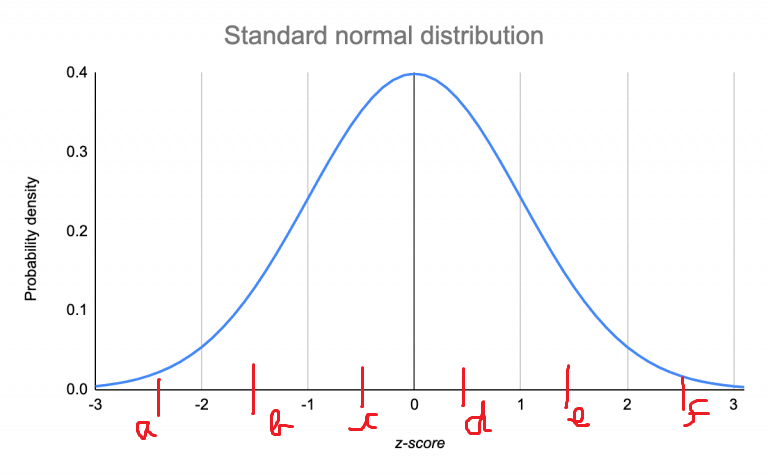

The final picture will be something like this:

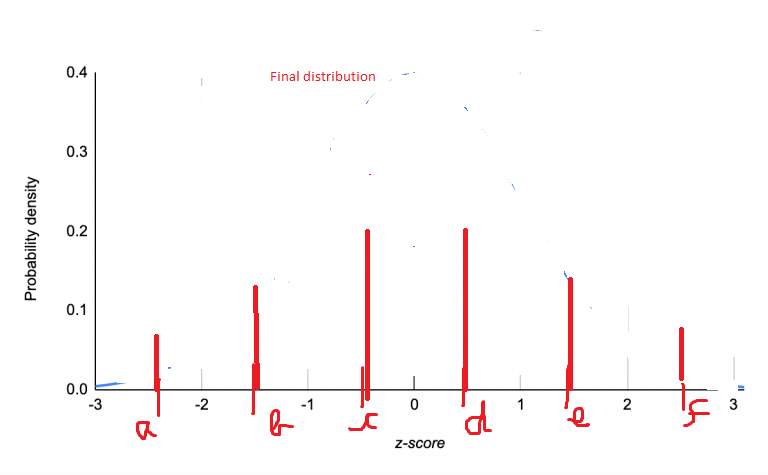

Equal bins plot. Divide (0-256) into 6  

In [15]:
# 5.0 Create 5-bins:
# Give as many equally spaced values as there
#  are clusters. These values will serve as 
#   boundaries of our bins:

# We want 6 values even though we have 5-clusters
# We, therefore, get 5-bins. We then calculate mid-point
# of each bin. This will be our centroid:

bin_boundary_values = np.linspace(0, 256, n_clusters + 1)
bin_boundary_values

array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. ])

Calcuate mean of each bin:

In [ ]:
# 5.1
bin_boundary_values
print()
# 5.1.1
# All but first value
bin_boundary_values[1:] 
print()
# 5.1.2
bin_boundary_values[:-1]
print()
# 5.1.3
bin_boundary_values[1:]  +  bin_boundary_values[:-1]
print()
# 5.1.4
(bin_boundary_values[1:]  +  bin_boundary_values[:-1]) * 0.5
# 5.1.5 Here is the mean of each bin
#       These are our 'centroids'
bin_center_values = .5 * (bin_boundary_values[1:] + bin_boundary_values[:-1])  
# 5.1.6
print()
bin_center_values

Our next task is to drop each pixel in `r_face` to correct bin. We will use `np.searchsorted()`. `np.searchsorted()` will tell us the index position in `regular_values` where each value of `r_face` would fall. 

`numpy.searchsorted()` function is used to find the *indices* (note again, we have to find indices) into a sorted array, `regular_values` in our case, such that, if elements (from `r_face`) are inserted <u>before</u> the indices, the order of `regular_values` would be still preserved. 

In [ ]:
# 6.0 Learning np.searchsorted()
# 6.1
np.searchsorted([1,2,3,4,5], 3)
print()
# 6.2
np.searchsorted([1,2,3,4,5], 3, side='right')
print()
# 6.3
np.searchsorted([1,2,3,4,5], [-10, 10, 2, 3])

In [ ]:
# 6.4 Get indicies of positions into bin_center_values
bin_labels = np.searchsorted(bin_center_values, r_face) 
bin_labels
print()
# 6.5
bin_labels.min()    # 0
print()
bin_labels.max()    # 5 (Greater than 4)

In [ ]:
# 6.6 Flatten bin_labels
bin_labels.ravel()

In [ ]:
# 6.7 Note bin_labels extremes 
min(bin_labels.ravel())    #  0
print()
max(bin_labels.ravel())    #  5  More than cluster numbers

In [ ]:
# 7.0 Experiment with mode='clip'
# mode: clip:  negative integers are mapped to 0;
#              values greater than n-1 are mapped to n-1; 
# 
bin_center_values
print()
# 7.1 Note how index '-1' and '6' are clipped to 0 and to 4 
np.choose(
           [-1,1,2,6],         # Indices
           bin_center_values,  # Get values corresponding to above
           mode = "clip"       # Clip -ve and high values
           )

In [ ]:
# 8.0 Finally replace pixel intensities
#     with 'bin' centroids
binned_face = np.choose(
                          bin_labels.ravel(),
                          bin_center_values,
                          mode = "clip"
                         )

print()
binned_face[:10]

In [ ]:
# 8.1 Reshape binned_face for plotting
binned_face.shape = r_face.shape

In [ ]:
# 8.2 Plot the binned face now
#_=plt.figure(3, figsize=(3, 2.2))
_=plt.imshow(
              binned_face,
              cmap=plt.cm.gray,
              vmin=vmin,
              vmax=vmax
             )

In [ ]:
np.sort(values)
print()
values[:-1]
print()
values[1:]
print()
list(zip(values[:-1], values[1:]))

In [ ]:
# Histogram
_=plt.figure(4, figsize=(3, 2.2))
# plt.close() closes the figure window entirely,
# where plt.clf() will just clear the figure
#  you can still paint another plot onto it.
_=plt.clf()

# Axes boundaries
_=plt.axes([.01, .01, .98, .98])

# Plot histogram of X-values
_=plt.hist(X, bins=256, color='.5', edgecolor='.5')

# No y-ticks
_=plt.yticks(())
# But plot x-ticks
_=plt.xticks(bin_center_values)

values = np.sort(values)
for center_1, center_2 in zip(values[:-1], values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b')

for center_1, center_2 in zip(bin_center_values[:-1], bin_center_values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b', linestyle='--')

plt.show()

In [ ]:
############ I am done #################